In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('C:/Users/yfawz/PS_20174392719_1491204439457_log.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(6362620, 11)

**There are 6.36 million transactions in this dataset which is a good number to be able to analyze an imbalanced dataset.**

In [5]:
data.isnull().sum(axis=0)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**Based on the dataset information, we can assume there are no null values that need to be dealt with**

In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
total_amount = data.amount.sum()

In [8]:
all_fraud = data[data.isFraud == 1]
fraud_amount = all_fraud.amount.sum()
print('There : {:.2f} + {}'.format(fraud_amount,fraud_amount))

There : 12056415427.84 + 12056415427.839998


In [9]:
np.sum(all_fraud.amount)/np.sum(data.amount)

0.010535206008606485

In [10]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [11]:
imb_ratio = data.isFraud.sum()/data.isFraud.count()
print('The imbalance ratio is : {:.3f}%'.format(imb_ratio*100))

The imbalance ratio is : 0.129%


 # Value Based
 - There is a total of 1,144 Billion Dollars worth of transactions.
 - There is a total of 12 Billion Dollars of Fraud transactions. 
 - This accounts to 1.05% of transactions value.
 # Count Based
 ## There are 8213 transaction out of 6.36 million transaction that are Fraud. This accounts for 0.129% of transactions.
 
 ### We can go deeper into this analysis by understanding more of:
  - The counts and amount values of different transaction types of all transactions.
  - The counts and amount values of different transaction types of fraudulent transactions.
  - How did the counts and values differ before and after we into account fraud.

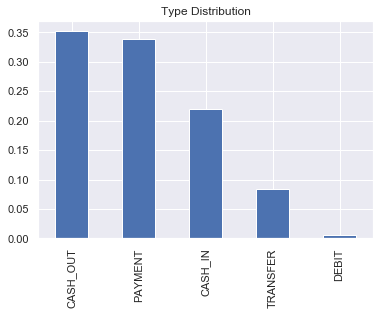

In [353]:
data.type.value_counts(normalize=True).plot(kind='bar',title='Transaction Type Distribution');

In [357]:
data.type.value_counts(normalize=True)

CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: type, dtype: float64

In [ ]:
type_amount = (data.groupby('type')['amount'].sum() * 100) / total_amount
#Percentage of the counts of each transaction type

In [ ]:
data.amount.plot.hist()

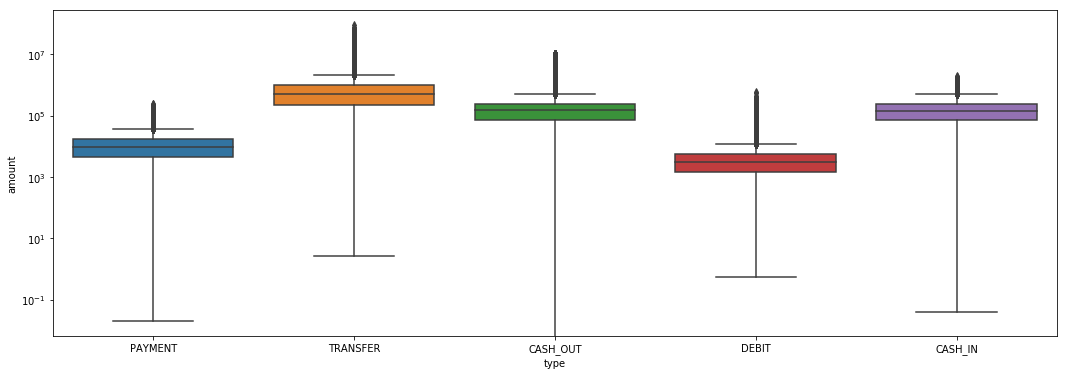

In [217]:
fig, ax= plt.subplots(figsize=(18, 6))
ax = ax.set_yscale('log')
sns.boxplot(x=data['type'],y=data['amount']);
#Variation of amounts of each transaction types

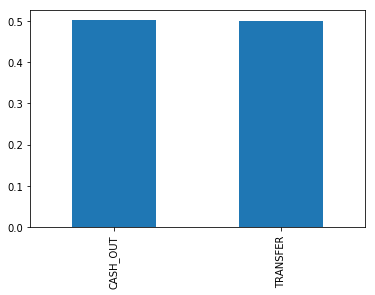

In [260]:
isFraud = data[data['isFraud'] == 1]
isFraud.type.value_counts(normalize=True).plot(kind='bar')

In [232]:
type_count_isFraud = isFraud[['type','amount']].groupby('type').count()
type_count_isFraud = type_count_isFraud.apply(lambda x: 100*x/(sum(type_count_isFraud.amount)))
type_count_isFraud
#Percentage of the counts of each transaction type

,amount
type,
CASH_OUT,50.11567
TRANSFER,49.88433


In [234]:
type_amount_isFraud = isFraud[['type','amount']].groupby('type').sum()
type_amount_isFraud = type_amount_isFraud.apply(lambda x: 100*x/(sum(type_amount_isFraud.amount)))
type_amount_isFraud
#Percentage of the counts of each transaction type

,amount
type,
CASH_OUT,49.676475
TRANSFER,50.323525


In [269]:
fraudall = data.groupby(['isFraud','isFlaggedFraud'])['step'].count()
fraudall.apply(lambda x:(100*x)/sum(fraudall))

isFraud  isFlaggedFraud
0        0                 99.870918
1        0                  0.128831
         1                  0.000251
Name: step, dtype: float64

#### We can see that 
 - 99.87% of all transaction are neither flagged nor classified as Fraud
 -  We can see that out 0.13% of all transactions are fraud but was not flagged by the security system.
 -  We can see that out 0.000251% of all transactions are fraud and were not flagged by the security system.

### We want to analyze fradulent transactions.

In [152]:
fraud = fraud.loc[1,[0,1]]
fraud.apply(lambda x:(100*x)/sum(fraud))

isFraud  isFlaggedFraud
1        0                 99.805187
         1                  0.194813
Name: step, dtype: float64

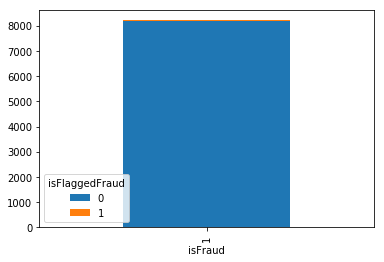

In [150]:
fraud.unstack().plot(kind='bar',stacked=True)

#### We can see that out of ALL fraudlent transactions, only 0.19% were flagged as Fraud while 99.81% were not flagged.

Is the higher the amount, the higher probability of fraudelence?

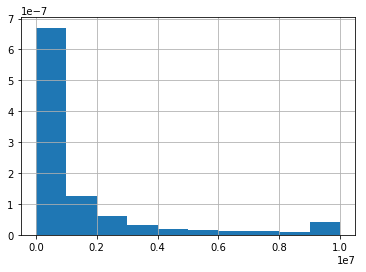

In [273]:
isFraud.amount.hist(bins=10,density=True)

In [308]:
x = np.sort(isFraud.amount)
y=np.arange(1,1+len(isFraud))/len(isFraud)

In [309]:
len(sorted_isFraud)

8213

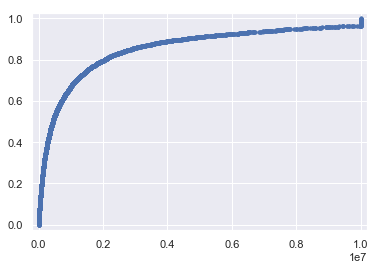

In [319]:
sns.set()
plt.scatter(x=x,y=y,marker='.')
plt.margins(0.02)

We can see that 80% of fraudlent transactions is less than 2million dollars

In [ ]:
sns.set()
plt.plot()